## Group Project Part II
### Group Number: 4
### Team Members: Nataly Chacon, Eric Dong, Juan Jerez, Islah Mohd Nadiman, and Jacky Wang.

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Cleaning

## Fill in Missing Values

In [145]:
dirtydf=pd.read_csv('dirty-avocado.csv',  parse_dates = ['Date'])

In [146]:
dirtydf.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.822200e+04,1.820300e+04,1.821800e+04,1.820600e+04,1.822600e+04,1.822400e+04,1.822500e+04,18209.000000,18249.000000
mean,24.232232,1.405978,8.516726e+05,2.930055e+05,2.954834e+05,2.288559e+04,2.398580e+05,1.823160e+05,5.437999e+04,3111.206721,2016.147899
std,15.481045,0.402677,3.455983e+06,1.263907e+06,1.205090e+06,1.075821e+05,9.868292e+05,7.466333e+05,2.441115e+05,17711.429099,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.085037e+04,8.547250e+02,3.010383e+03,0.000000e+00,5.089083e+03,2.860057e+03,1.280700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.076544e+05,8.689450e+03,2.909868e+04,1.872250e+02,3.979057e+04,2.640419e+04,2.649830e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.335570e+05,1.112340e+05,1.502919e+05,6.259002e+03,1.108758e+05,8.335586e+04,2.205457e+04,133.330000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [147]:
dirtydf.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [148]:
dirtydf.isnull().sum(axis=0)

Unnamed: 0       0
Date             0
AveragePrice     0
Total Volume    27
4046            46
4225            31
4770            43
Total Bags      23
Small Bags      25
Large Bags      24
XLarge Bags     40
type            40
year             0
region           0
dtype: int64

In [149]:
for col in dirtydf: #find number of unique values. Only applies to the type, year, region (discrete vals).
    print(col, dirtydf[col].nunique())


Unnamed: 0 53
Date 169
AveragePrice 259
Total Volume 18210
4046 17662
4225 18073
4770 12061
Total Bags 18074
Small Bags 17297
Large Bags 15065
XLarge Bags 5581
type 2
year 4
region 54


In [150]:
dirtydf.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [151]:
dirtydf['type'].value_counts() 

conventional    9116
organic         9093
Name: type, dtype: int64

In [152]:
s=dirtydf['region'].value_counts()
regions = s.index.tolist()

d=dirtydf['year'].value_counts()
years = d.index.tolist()

years

[2017, 2016, 2015, 2018]

In [153]:
cleandf = pd.DataFrame(columns=dirtydf.columns.values.tolist())
#print(cleandf)

valuestofill = ['Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

#fill na based on average of region and year
#fill type based on most common
for region in regions: 
    tempdf = dirtydf[dirtydf['region']==region]
    for year in years:
        newtempdf = tempdf[tempdf['year']==year]
        for col in valuestofill:
            if newtempdf[col].isnull().sum() > 0:
                newtempdf[col]=newtempdf[col].fillna(newtempdf[col].mean())
        if newtempdf['type'].isnull().sum() > 0:
            mode = newtempdf['type'].mode()[0]
            newtempdf['type']=newtempdf['type'].fillna(mode)
        cleandf = cleandf.append(newtempdf)

    

C:\Users\Clash\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Clash\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [154]:
cleandf.isnull().sum(axis=0)

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

## Changing the conventional/organic column to 0/1

In [155]:
dummy_columns = pd.get_dummies(cleandf['type'], drop_first=True)
cleandf=pd.concat([cleandf, dummy_columns], axis=1)

In [156]:
cleandf.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,organic
5616,0,2017-12-31,1.47,113514.42,2622.70,101135.53,20.25,9735.94,5556.98,4178.96,0.0,conventional,2017,Albany,0
5617,1,2017-12-24,1.45,77039.09,2811.71,58592.23,19.06,15616.09,6863.18,8752.91,0.0,conventional,2017,Albany,0
5618,2,2017-12-17,1.43,70677.56,2578.95,50811.52,79.18,17207.91,8914.13,8293.78,0.0,conventional,2017,Albany,0
5619,3,2017-12-10,1.29,92325.53,3220.05,75147.56,104.36,13853.56,7268.21,6585.35,0.0,conventional,2017,Albany,0
5620,4,2017-12-03,1.39,139970.00,3772.00,126551.00,136.00,9511.00,7061.00,2450.00,0.0,conventional,2017,Albany,0


## Remove unneeded columns, which are 'Total Volume', 'Total Bags', 'Unnamed: 0', and 'type'.

In [157]:
colstodrop=['Total Volume', 'Total Bags', 'Unnamed: 0', 'type'] #Volume is add 3 types and total bags. #bags are total of bags
df = cleandf.drop(colstodrop, axis = 1)


df.head()

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,organic
5616,2017-12-31,1.47,2622.70,101135.53,20.25,5556.98,4178.96,0.0,2017,Albany,0
5617,2017-12-24,1.45,2811.71,58592.23,19.06,6863.18,8752.91,0.0,2017,Albany,0
5618,2017-12-17,1.43,2578.95,50811.52,79.18,8914.13,8293.78,0.0,2017,Albany,0
5619,2017-12-10,1.29,3220.05,75147.56,104.36,7268.21,6585.35,0.0,2017,Albany,0
5620,2017-12-03,1.39,3772.00,126551.00,136.00,7061.00,2450.00,0.0,2017,Albany,0


In [158]:
import datetime
month= df['Date'].dt.month

df.insert(1, 'Month' ,month) 
#TODO: convert to actual numbers to include year

In [159]:
df.head()

,Date,Month,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,organic
5616,2017-12-31,12,1.47,2622.70,101135.53,20.25,5556.98,4178.96,0.0,2017,Albany,0
5617,2017-12-24,12,1.45,2811.71,58592.23,19.06,6863.18,8752.91,0.0,2017,Albany,0
5618,2017-12-17,12,1.43,2578.95,50811.52,79.18,8914.13,8293.78,0.0,2017,Albany,0
5619,2017-12-10,12,1.29,3220.05,75147.56,104.36,7268.21,6585.35,0.0,2017,Albany,0
5620,2017-12-03,12,1.39,3772.00,126551.00,136.00,7061.00,2450.00,0.0,2017,Albany,0


C:\Users\Clash\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='4046', ylabel='Density'>

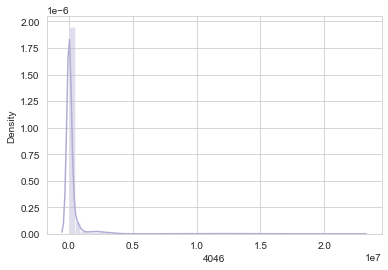

In [160]:
#Visualize data
valuestofill = [ '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']
sns.set_palette("Purples_d")
sns.set_style('whitegrid')

sns.distplot(df['4046'])

## Remove regions that are duplicates of other terms. 
### For example, 'TotalUS' is the aggregate of all other columns and the values are considered outliers due to being much larger compared to the other columns.

In [161]:
df = df[(df['region']!= 'TotalUS') &
          (df['region']!= 'SouthCentral') &
          (df['region']!= 'California') &
          (df['region']!= 'West') &
          (df['region']!= 'Southeast') &
          (df['region']!= 'Plains') &
          (df['region']!= 'Midsouth') &
          (df['region']!= 'Northeast') &
          (df['region']!= 'Plains') &
          (df['region']!= 'GreatLakes')
         ]

In [162]:
df['region'].value_counts()

Albany                 338
BaltimoreWashington    338
Boston                 338
BuffaloRochester       338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Boise                  338
Nashville              338
Sacramento             338
NewOrleansMobile       338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
S

In [163]:
df['region'].nunique()

45

## Take 500 data points from the data for the "black market" avocados

In [164]:
black_market_avocados = df.sample(n=500,random_state=100)

In [165]:
black_market_avocados['region'].value_counts()

Pittsburgh             19
Columbus               17
Sacramento             17
Albany                 17
Philadelphia           17
SanFrancisco           16
HarrisburgScranton     15
NewOrleansMobile       15
MiamiFtLauderdale      15
SouthCarolina          15
Spokane                15
Portland               13
DallasFtWorth          13
LosAngeles             13
WestTexNewMexico       13
Nashville              12
Detroit                12
Charlotte              12
Boise                  11
StLouis                11
RichmondNorfolk        11
Jacksonville           10
BuffaloRochester       10
Roanoke                10
Boston                 10
Chicago                 9
RaleighGreensboro       9
PhoenixTucson           9
GrandRapids             9
NewYork                 9
CincinnatiDayton        9
NorthernNewEngland      9
LasVegas                9
Houston                 9
Seattle                 8
BaltimoreWashington     8
Atlanta                 8
Denver                  8
Tampa       

In [166]:
black_market_avocados['region'].nunique()

45

In [167]:
index = black_market_avocados.index

df.drop(index,inplace=True)

In [168]:
df['region'].value_counts()

HartfordSpringfield    332
Orlando                332
SanDiego               332
Syracuse               331
Indianapolis           331
Tampa                  330
Denver                 330
Louisville             330
BaltimoreWashington    330
Atlanta                330
Seattle                330
GrandRapids            329
CincinnatiDayton       329
Chicago                329
LasVegas               329
NewYork                329
Houston                329
RaleighGreensboro      329
NorthernNewEngland     329
PhoenixTucson          329
Roanoke                328
Boston                 328
BuffaloRochester       328
Jacksonville           328
StLouis                327
RichmondNorfolk        327
Boise                  327
Detroit                326
Charlotte              326
Nashville              326
Portland               325
DallasFtWorth          325
LosAngeles             325
Spokane                323
NewOrleansMobile       323
MiamiFtLauderdale      323
HarrisburgScranton     323
S

## Finding the Sum of the Avocados Sold for organic and conventional.

In [169]:
organic = df[df['organic']==1]
organic_total = organic['4046'].sum() + organic['4225'].sum() + organic['4770'].sum()
organic_total

56525613.46174358

In [170]:
conventional = df[df['organic']==0]
conventional_total = conventional['4046'].sum() + conventional['4225'].sum() + conventional['4770'].sum()
conventional_total

2546969096.4426475

In [172]:
organic_percentage = 100*(organic_total)/(organic_total+conventional_total)
print('The organic avocados percentage by volume:')
print(organic_percentage,'%')

The organic avocados percentage by volume:
2.1711437801930233 %


## Remove Outliers

### Average price

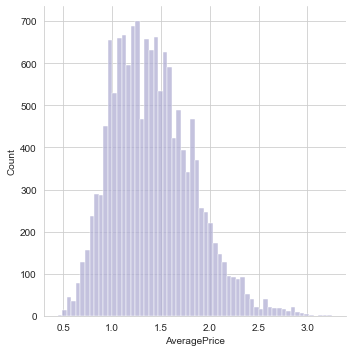

In [28]:
sns.set_palette("Purples_d")
sns.set_style('whitegrid')

sns.displot(df['AveragePrice']) #No outliers

### 4046

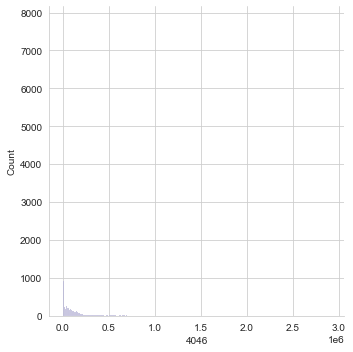

In [29]:
sns.displot(df['4046'])

<AxesSubplot:xlabel='4046'>

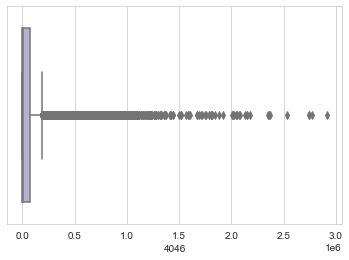

In [30]:
sns.boxplot(x=df['4046'])

In [31]:
#Remove outliers
UB = df['4046'].quantile(0.99)
LB = df['4046'].quantile(0.01)
LB, UB

(0.0, 976868.390400001)

In [32]:
Q3 = df['4046'].quantile(0.75)
Q1 = df['4046'].quantile(0.25)
IQR = Q3 - Q1
IQR_min = Q1 - 1.5*IQR
IQR_max = Q3 + 1.5*IQR
Q1, Q3, IQR, IQR_min, IQR_max

(541.485,
 76403.305,
 75861.81999999999,
 -113251.24499999998,
 190196.03499999997)

In [33]:
STD = df['4046'].std()
STD_UB = df['4046'].mean() + 3 * STD
STD_LB = np.mean(df['4046']) - 3 * STD
STD, STD_LB, STD_UB

(197352.76900077704, -511179.6346646976, 672936.9793399647)

In [34]:
#Count the number of outliers
(df['4046']<min(LB, IQR_min,STD_LB)).sum() +  (df['4046']>max(UB, IQR_max,STD_UB)).sum()

148

In [35]:
(df['4046']>max(UB, IQR_max,STD_UB)).sum()

148

Since all outlier values occurred by exceeding the upper bound of the obtained range, we replace all outlier values of 4046 by the upper bound of the range-1, so that these values are still high but not high enough to be identified as outliers.

In [36]:
df['4046'].apply(lambda x: df['4046'].replace(x, max(UB, IQR_max,STD_UB)-1, inplace =True) if (x>max(UB, IQR_max,STD_UB)) else x)


5616     2622.70
5617     2811.71
5618     2578.95
5620     3772.00
5621     2413.00
          ...   
18244    2046.96
18245    1191.70
18246    1191.92
18247    1527.63
18248    2894.77
Name: 4046, Length: 14707, dtype: float64

In [37]:
(df['4046']>max(UB, IQR_max,STD_UB)).sum()

0

### 4225

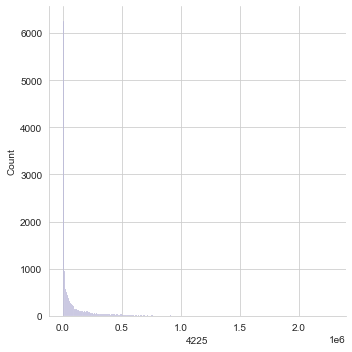

In [38]:
#4225
sns.displot(df['4225'])

In [39]:
#Remove outliers
UB = df['4225'].quantile(0.99)
LB = df['4225'].quantile(0.01)
LB, UB

(7.7572, 785548.7654000019)

In [40]:
Q3 = df['4225'].quantile(0.75)
Q1 = df['4225'].quantile(0.25)
IQR = Q3 - Q1
IQR_min = Q1 - 1.5*IQR
IQR_max = Q3 + 1.5*IQR
Q1, Q3, IQR, IQR_min, IQR_max

(2105.455, 95584.625, 93479.17, -138113.30000000002, 235803.38)

In [41]:
STD = df['4225'].std()
STD_UB = df['4225'].mean() + 3 * STD
STD_LB = np.mean(df['4225']) - 3 * STD
STD, STD_LB, STD_UB

(166767.1250610681, -411012.4050177195, 589590.3453486891)

In [42]:
#Count the number of outliers
(df['4225']<min(LB, IQR_min,STD_LB)).sum() +  (df['4225']>max(UB, IQR_max,STD_UB)).sum()

148

In [43]:
(df['4225']>max(UB, IQR_max,STD_UB)).sum()

148

Since all outlier values occurred by exceeding the upper bound of the obtained range, we replace all outlier values of 4225 by the upper bound of the range-1, so that these values are still high but not high enough to be identified as outliers.

In [44]:
df['4225'].apply(lambda x: df['4225'].replace(x, max(UB, IQR_max,STD_UB)-1, inplace =True) if (x>max(UB, IQR_max,STD_UB)) else x)

5616     101135.53
5617      58592.23
5618      50811.52
5620     126551.00
5621      49076.00
           ...    
18244      1529.20
18245      3431.50
18246      2452.79
18247      2981.04
18248      2356.13
Name: 4225, Length: 14707, dtype: float64

In [45]:
(df['4225']>max(UB, IQR_max,STD_UB)).sum()

0

### 4770

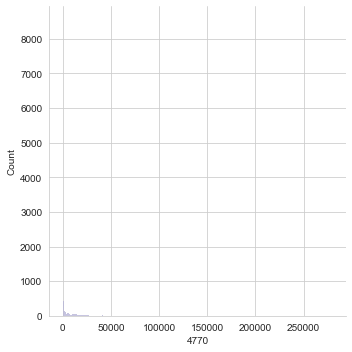

In [46]:
sns.displot(df['4770'])

In [47]:
#Remove outliers
UB = df['4770'].quantile(0.99)
LB = df['4770'].quantile(0.01)
LB, UB

(0.0, 109360.98320000008)

In [48]:
Q3 = df['4770'].quantile(0.75)
Q1 = df['4770'].quantile(0.25)
IQR = Q3 - Q1
IQR_min = Q1 - 1.5*IQR
IQR_max = Q3 + 1.5*IQR
Q1, Q3, IQR, IQR_min, IQR_max

(0.0, 3406.805, 3406.805, -5110.2074999999995, 8517.012499999999)

In [49]:
STD = df['4770'].std()
STD_UB = df['4770'].mean() + 3 * STD
STD_LB = np.mean(df['4770']) - 3 * STD
STD, STD_LB, STD_UB

(19823.67523518739, -52614.481773350744, 66327.56963777362)

In [50]:
#Count the number of outliers
(df['4770']<min(LB, IQR_min,STD_LB)).sum() +  (df['4770']>max(UB, IQR_max,STD_UB)).sum()

148

In [51]:
(df['4770']>max(UB, IQR_max,STD_UB)).sum()

148

Since all outlier values occurred by exceeding the upper bound of the obtained range, we replace all outlier values of 4770 by the upper bound of the range-1, so that these values are still high but not high enough to be identified as outliers.

In [52]:
df['4770'].apply(lambda x: df['4770'].replace(x, max(UB, IQR_max,STD_UB)-1, inplace =True) if (x>max(UB, IQR_max,STD_UB)) else x)


5616       20.250000
5617       19.060000
5618       79.180000
5620      136.000000
5621       62.000000
            ...     
18244       0.000000
18245    5253.172174
18246     727.940000
18247     727.010000
18248     224.530000
Name: 4770, Length: 14707, dtype: float64

In [53]:
(df['4770']>max(UB, IQR_max,STD_UB)).sum()

0

### Small Bags

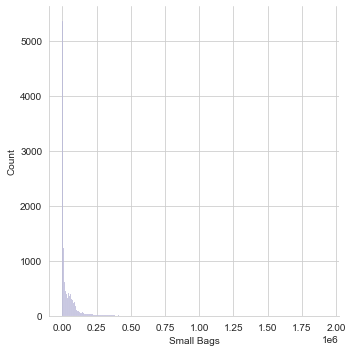

In [54]:
sns.displot(df['Small Bags'])

In [55]:
#Remove outliers
UB = df['Small Bags'].quantile(0.99)
LB = df['Small Bags'].quantile(0.01)
LB, UB

(0.0, 511612.67820000055)

In [56]:
Q3 = df['Small Bags'].quantile(0.75)
Q1 = df['Small Bags'].quantile(0.25)
IQR = Q3 - Q1
IQR_min = Q1 - 1.5*IQR
IQR_max = Q3 + 1.5*IQR
Q1, Q3, IQR, IQR_min, IQR_max

(1813.135, 63545.37, 61732.235, -90785.21750000001, 156143.7225)

In [57]:
STD = df['Small Bags'].std()
STD_UB = df['Small Bags'].mean() + 3 * STD
STD_LB = np.mean(df['Small Bags']) - 3 * STD
STD, STD_LB, STD_UB

(123223.66101541808, -314709.58349962597, 424632.38259288255)

In [58]:
#Count the number of outliers
(df['Small Bags']<min(LB, IQR_min,STD_LB)).sum() +  (df['Small Bags']>max(UB, IQR_max,STD_UB)).sum()

148

In [59]:
(df['Small Bags']>max(UB, IQR_max,STD_UB)).sum()

148

Since all outlier values occurred by exceeding the upper bound of the obtained range, we replace all outlier values of Small Bags by the upper bound of the range-1, so that these values are still high but not high enough to be identified as outliers.

In [60]:
df['Small Bags'].apply(lambda x: df['Small Bags'].replace(x, max(UB, IQR_max,STD_UB)-1, inplace =True) if (x>max(UB, IQR_max,STD_UB)) else x)


5616      5556.98
5617      6863.18
5618      8914.13
5620      7061.00
5621      5059.00
           ...   
18244    13066.82
18245     8940.04
18246     9351.80
18247    10919.54
18248    11988.14
Name: Small Bags, Length: 14707, dtype: float64

In [61]:
(df['Small Bags']>max(UB, IQR_max,STD_UB)).sum()

0

### Large Bags

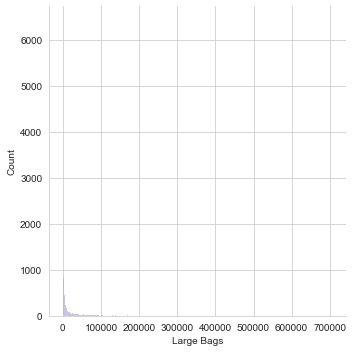

In [62]:
sns.displot(df['Large Bags'])

In [63]:
#Remove outliers
UB = df['Large Bags'].quantile(0.99)
LB = df['Large Bags'].quantile(0.01)
LB, UB

(0.0, 207609.2208000003)

In [64]:
Q3 = df['Large Bags'].quantile(0.75)
Q1 = df['Large Bags'].quantile(0.25)
IQR = Q3 - Q1
IQR_min = Q1 - 1.5*IQR
IQR_max = Q3 + 1.5*IQR
Q1, Q3, IQR, IQR_min, IQR_max

(45.75, 11089.75, 11044.0, -16520.25, 27655.75)

In [65]:
STD = df['Large Bags'].std()
STD_UB = df['Large Bags'].mean() + 3 * STD
STD_LB = np.mean(df['Large Bags']) - 3 * STD
STD, STD_LB, STD_UB

(42426.01926265604, -111151.6831657006, 143404.43241023563)

In [66]:
#Count the number of outliers
(df['Large Bags']<min(LB, IQR_min,STD_LB)).sum() +  (df['Large Bags']>max(UB, IQR_max,STD_UB)).sum()

148

In [67]:
(df['Large Bags']>max(UB, IQR_max,STD_UB)).sum()

148

Since all outlier values occurred by exceeding the upper bound of the obtained range, we replace all outlier values of Large Bags by the upper bound of the range-1, so that these values are still high but not high enough to be identified as outliers.

In [68]:
df['Large Bags'].apply(lambda x: df['Large Bags'].replace(x, max(UB, IQR_max,STD_UB)-1, inplace =True) if (x>max(UB, IQR_max,STD_UB)) else x)


5616     4178.96
5617     8752.91
5618     8293.78
5620     2450.00
5621     6368.00
          ...   
18244     431.85
18245     324.80
18246      42.31
18247      50.00
18248      26.01
Name: Large Bags, Length: 14707, dtype: float64

In [69]:
(df['Large Bags']>max(UB, IQR_max,STD_UB)).sum()

0

### XLarge Bags

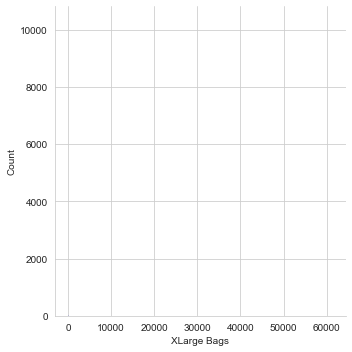

In [70]:
sns.displot(df['XLarge Bags'])

In [71]:
#Remove outliers
UB = df['XLarge Bags'].quantile(0.99)
LB = df['XLarge Bags'].quantile(0.01)
LB, UB

(0.0, 18095.284200000016)

In [72]:
Q3 = df['XLarge Bags'].quantile(0.75)
Q1 = df['XLarge Bags'].quantile(0.25)
IQR = Q3 - Q1
IQR_min = Q1 - 1.5*IQR
IQR_max = Q3 + 1.5*IQR
Q1, Q3, IQR, IQR_min, IQR_max

(0.0,
 38.099999999999994,
 38.099999999999994,
 -57.14999999999999,
 95.24999999999999)

In [73]:
STD = df['XLarge Bags'].std()
STD_UB = df['XLarge Bags'].mean() + 3 * STD
STD_LB = np.mean(df['XLarge Bags']) - 3 * STD
STD, STD_LB, STD_UB

(3873.699421904778, -10718.901329412422, 12523.295202016247)

In [74]:
#Count the number of outliers
(df['XLarge Bags']<min(LB, IQR_min,STD_LB)).sum() +  (df['XLarge Bags']>max(UB, IQR_max,STD_UB)).sum()

148

In [75]:
(df['XLarge Bags']>max(UB, IQR_max,STD_UB)).sum()

148

Since all outlier values occurred by exceeding the upper bound of the obtained range, we replace all outlier values of XLarge Bags by the upper bound of the range-1, so that these values are still high but not high enough to be identified as outliers.

In [76]:
df['XLarge Bags'].apply(lambda x: df['XLarge Bags'].replace(x, max(UB, IQR_max,STD_UB)-1, inplace =True) if (x>max(UB, IQR_max,STD_UB)) else x)


5616        0.000000
5617        0.000000
5618        0.000000
5620        0.000000
5621        0.000000
            ...     
18244       0.000000
18245       0.000000
18246    1102.973043
18247       0.000000
18248       0.000000
Name: XLarge Bags, Length: 14707, dtype: float64

In [77]:
(df['XLarge Bags']>max(UB, IQR_max,STD_UB)).sum()

0

##  Create dummy variables for categorical variables

In [78]:
df

,Date,Month,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,organic
5616,2017-12-31,12,1.47,2622.70,101135.53,20.250000,5556.98,4178.96,0.000000,2017,Albany,0
5617,2017-12-24,12,1.45,2811.71,58592.23,19.060000,6863.18,8752.91,0.000000,2017,Albany,0
5618,2017-12-17,12,1.43,2578.95,50811.52,79.180000,8914.13,8293.78,0.000000,2017,Albany,0
5620,2017-12-03,12,1.39,3772.00,126551.00,136.000000,7061.00,2450.00,0.000000,2017,Albany,0
5621,2017-11-26,11,1.50,2413.00,49076.00,62.000000,5059.00,6368.00,0.000000,2017,Albany,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,2,1.63,2046.96,1529.20,0.000000,13066.82,431.85,0.000000,2018,WestTexNewMexico,1
18245,2018-01-28,1,1.71,1191.70,3431.50,5253.172174,8940.04,324.80,0.000000,2018,WestTexNewMexico,1
18246,2018-01-21,1,1.87,1191.92,2452.79,727.940000,9351.80,42.31,1102.973043,2018,WestTexNewMexico,1
18247,2018-01-14,1,1.93,1527.63,2981.04,727.010000,10919.54,50.00,0.000000,2018,WestTexNewMexico,1


In [79]:
transform_these_columns = ['region']
dummy_columns = pd.get_dummies(df[transform_these_columns], drop_first=True)

In [80]:
#Display labels of all dummy columns
dummy_columns.columns

Index(['region_Atlanta', 'region_BaltimoreWashington', 'region_Boise',
       'region_Boston', 'region_BuffaloRochester', 'region_Charlotte',
       'region_Chicago', 'region_CincinnatiDayton', 'region_Columbus',
       'region_DallasFtWorth', 'region_Denver', 'region_Detroit',
       'region_GrandRapids', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Nashville',
       'region_NewOrleansMobile', 'region_NewYork',
       'region_NorthernNewEngland', 'region_Orlando', 'region_Philadelphia',
       'region_PhoenixTucson', 'region_Pittsburgh', 'region_Portland',
       'region_RaleighGreensboro', 'region_RichmondNorfolk', 'region_Roanoke',
       'region_Sacramento', 'region_SanDiego', 'region_SanFrancisco',
       'region_Seattle', 'region_SouthCarolina', 'region_Spokane',
       'region_StLouis'

In [81]:
#Add created dummy columns into the original data set.
df = pd.concat([df, dummy_columns], axis=1)
df.head()

,Date,Month,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,...,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico
5616,2017-12-31,12,1.47,2622.70,101135.53,20.25,5556.98,4178.96,0.0,2017,...,0,0,0,0,0,0,0,0,0,0
5617,2017-12-24,12,1.45,2811.71,58592.23,19.06,6863.18,8752.91,0.0,2017,...,0,0,0,0,0,0,0,0,0,0
5618,2017-12-17,12,1.43,2578.95,50811.52,79.18,8914.13,8293.78,0.0,2017,...,0,0,0,0,0,0,0,0,0,0
5620,2017-12-03,12,1.39,3772.00,126551.00,136.00,7061.00,2450.00,0.0,2017,...,0,0,0,0,0,0,0,0,0,0
5621,2017-11-26,11,1.50,2413.00,49076.00,62.00,5059.00,6368.00,0.0,2017,...,0,0,0,0,0,0,0,0,0,0


In [82]:
#Drop the original columns for which dummies are created.
df.drop(transform_these_columns, axis=1, inplace=True)
df.head()

,Date,Month,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,...,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico
5616,2017-12-31,12,1.47,2622.70,101135.53,20.25,5556.98,4178.96,0.0,2017,...,0,0,0,0,0,0,0,0,0,0
5617,2017-12-24,12,1.45,2811.71,58592.23,19.06,6863.18,8752.91,0.0,2017,...,0,0,0,0,0,0,0,0,0,0
5618,2017-12-17,12,1.43,2578.95,50811.52,79.18,8914.13,8293.78,0.0,2017,...,0,0,0,0,0,0,0,0,0,0
5620,2017-12-03,12,1.39,3772.00,126551.00,136.00,7061.00,2450.00,0.0,2017,...,0,0,0,0,0,0,0,0,0,0
5621,2017-11-26,11,1.50,2413.00,49076.00,62.00,5059.00,6368.00,0.0,2017,...,0,0,0,0,0,0,0,0,0,0


## Convert date to decimal date

In [83]:
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length

In [84]:
df['Date'] = df['Date'].apply(lambda x:year_fraction(x))

In [85]:
df.head()

,Date,Month,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,...,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico
5616,2017.997260,12,1.47,2622.70,101135.53,20.25,5556.98,4178.96,0.0,2017,...,0,0,0,0,0,0,0,0,0,0
5617,2017.978082,12,1.45,2811.71,58592.23,19.06,6863.18,8752.91,0.0,2017,...,0,0,0,0,0,0,0,0,0,0
5618,2017.958904,12,1.43,2578.95,50811.52,79.18,8914.13,8293.78,0.0,2017,...,0,0,0,0,0,0,0,0,0,0
5620,2017.920548,12,1.39,3772.00,126551.00,136.00,7061.00,2450.00,0.0,2017,...,0,0,0,0,0,0,0,0,0,0
5621,2017.901370,11,1.50,2413.00,49076.00,62.00,5059.00,6368.00,0.0,2017,...,0,0,0,0,0,0,0,0,0,0


In [86]:
# drop month and year
df.drop(['Month','year'],axis=1, inplace=True)

In [87]:
df

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,organic,region_Atlanta,...,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico
5616,2017.997260,1.47,2622.70,101135.53,20.250000,5556.98,4178.96,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
5617,2017.978082,1.45,2811.71,58592.23,19.060000,6863.18,8752.91,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
5618,2017.958904,1.43,2578.95,50811.52,79.180000,8914.13,8293.78,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
5620,2017.920548,1.39,3772.00,126551.00,136.000000,7061.00,2450.00,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
5621,2017.901370,1.50,2413.00,49076.00,62.000000,5059.00,6368.00,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018.093151,1.63,2046.96,1529.20,0.000000,13066.82,431.85,0.000000,1,0,...,0,0,0,0,0,0,0,0,0,1
18245,2018.073973,1.71,1191.70,3431.50,5253.172174,8940.04,324.80,0.000000,1,0,...,0,0,0,0,0,0,0,0,0,1
18246,2018.054795,1.87,1191.92,2452.79,727.940000,9351.80,42.31,1102.973043,1,0,...,0,0,0,0,0,0,0,0,0,1
18247,2018.035616,1.93,1527.63,2981.04,727.010000,10919.54,50.00,0.000000,1,0,...,0,0,0,0,0,0,0,0,0,1


## Data Scaling

Do I scale the date??

In [88]:
SS = StandardScaler() 

In [89]:
dfn=df.copy()
dfn[['Date','AveragePrice','4046','4046','4225','4770','Small Bags','Large Bags', 'XLarge Bags']] = SS.fit_transform(df[['Date','AveragePrice','4046','4046','4225','4770','Small Bags','Large Bags', 'XLarge Bags']])
dfn.head()

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,organic,region_Atlanta,...,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico
5616,1.477180,0.131863,-0.442790,0.096581,-0.366810,-0.527178,-0.316487,-0.292752,0,0,...,0,0,0,0,0,0,0,0,0,0
5617,1.456640,0.083434,-0.441661,-0.186403,-0.366877,-0.511716,-0.183617,-0.292752,0,0,...,0,0,0,0,0,0,0,0,0,0
5618,1.436099,0.035004,-0.443051,-0.238157,-0.363509,-0.487438,-0.196955,-0.292752,0,0,...,0,0,0,0,0,0,0,0,0,0
5620,1.395018,-0.061855,-0.435928,0.265636,-0.360325,-0.509375,-0.366713,-0.292752,0,0,...,0,0,0,0,0,0,0,0,0,0
5621,1.374477,0.204508,-0.444042,-0.249701,-0.364471,-0.533073,-0.252897,-0.292752,0,0,...,0,0,0,0,0,0,0,0,0,0


## Set up train/test data set (organic-classification)

In [90]:
y_organic = dfn['organic']

In [91]:
X_organic = dfn.drop(['organic'], axis=1)

In [92]:
Xo_train, Xo_test, yo_train, yo_test = train_test_split(X_organic, y_organic, test_size=0.3, random_state=102)

In [93]:
round((sum(yo_train==1)/len(yo_train.index))*100 , 2) #Calculate the percentage of occurence 1. Data set is not inbalanced


49.8

## Set up train/test data set (Price-regression)

In [94]:
y_price = df['AveragePrice']

In [95]:
X_price = dfn.drop(['AveragePrice'], axis=1)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_price, y_price, test_size=0.3, random_state=102)

 There are two sets of training and test sets.
 - For the organic-classification models, the data used are: Xo_train, Xo_test, yo_train, yo_test
 - For the price-regression models, the data used are: X_train, X_test, y_train, y_test

# Regression Model Application
## Question 1

### Correlation Analysis
Evaluate correlation between different predictors, as well as between predictors and target 'AveragePrice'

In [97]:
correlation_matrix = round(dfn[['AveragePrice','Date','4046',
                               '4225','4770','Small Bags',
                               'Large Bags', 'XLarge Bags',
                               'organic']].corr(),2)
correlation_matrix

,AveragePrice,Date,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,organic
AveragePrice,1.00,0.14,-0.46,-0.33,-0.27,-0.39,-0.37,-0.18,0.60
Date,0.14,1.00,0.00,-0.03,-0.08,0.12,0.15,0.11,-0.00
4046,-0.46,0.00,1.00,0.43,0.43,0.62,0.46,0.41,-0.44
4225,-0.33,-0.03,0.43,1.00,0.53,0.68,0.30,0.30,-0.54
4770,-0.27,-0.08,0.43,0.53,1.00,0.44,0.14,0.52,-0.36
Small Bags,-0.39,0.12,0.62,0.68,0.44,1.00,0.35,0.46,-0.53
Large Bags,-0.37,0.15,0.46,0.30,0.14,0.35,1.00,0.15,-0.37
XLarge Bags,-0.18,0.11,0.41,0.30,0.52,0.46,0.15,1.00,-0.29
organic,0.60,-0.00,-0.44,-0.54,-0.36,-0.53,-0.37,-0.29,1.00


In [98]:
correlation_matrix_abs = abs(correlation_matrix)
correlation_matrix_abs

,AveragePrice,Date,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,organic
AveragePrice,1.00,0.14,0.46,0.33,0.27,0.39,0.37,0.18,0.60
Date,0.14,1.00,0.00,0.03,0.08,0.12,0.15,0.11,0.00
4046,0.46,0.00,1.00,0.43,0.43,0.62,0.46,0.41,0.44
4225,0.33,0.03,0.43,1.00,0.53,0.68,0.30,0.30,0.54
4770,0.27,0.08,0.43,0.53,1.00,0.44,0.14,0.52,0.36
Small Bags,0.39,0.12,0.62,0.68,0.44,1.00,0.35,0.46,0.53
Large Bags,0.37,0.15,0.46,0.30,0.14,0.35,1.00,0.15,0.37
XLarge Bags,0.18,0.11,0.41,0.30,0.52,0.46,0.15,1.00,0.29
organic,0.60,0.00,0.44,0.54,0.36,0.53,0.37,0.29,1.00


<AxesSubplot:>

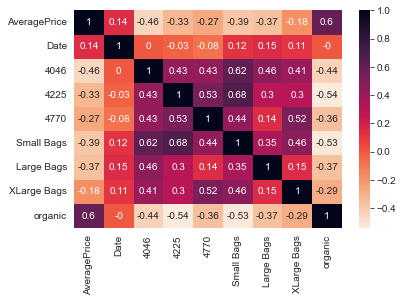

In [99]:
# Plot of correlation matrix
sns.heatmap(data=correlation_matrix, annot=True, cmap="rocket_r")

<AxesSubplot:>

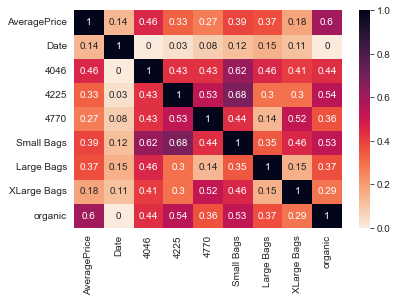

In [100]:
# Plot of absolute values of correlation matrix
sns.heatmap(data=correlation_matrix_abs, annot=True, cmap="rocket_r")

### Set up X's
We will test regression models that include various combinations of predictors, starting with the ones that have the highest correlation to the target (i.e., 'organic' and '4046').  'Large Bags' and 'XLarge Bags' could be correlated to 'Small Bags', which is why we add them gradually.  Likewise '4225' and '4770' could be correlated to '4046', so we add them gradually as well.  The correlation matrix, however, does not indicate that these variables are highly correlated.  Finally, we will also try one model that includes all of the predictors, including all of the region variables.

In [101]:
features = []
features.append (['organic'])
features.append (['organic', '4046'])
features.append (['organic', '4046', 'Small Bags'])
features.append (['organic', '4046', 'Small Bags', '4225', 'Large Bags'])
features.append (['organic', '4046', 'Small Bags', '4225', 'Large Bags', '4770', 'XLarge Bags'])
features.append (['organic', '4046', 'Small Bags', '4225', 'Large Bags', '4770', 'XLarge Bags', 'Date'])
features.append (list(X_train.columns))

### Model Fitting and Predictions
Here I optimize the evaluation of various models by looping over the different combinations of predictors created in the previous section, and calculate different metrics for each model, including Train R^2, Test R^2, Train Adjusted R^2, Test Adjusted R^2, Train RMSE, and Test RMSE.

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [103]:
results = pd.DataFrame(columns=['Independent Variables',
        'Intercept', 'Coefficients',
        'Train R^2', 'Test R^2', 'Train Adjusted R^2', 
        'Test Adjusted R^2', 'Train RMSE', 'Test RMSE'])
for i in features:
        
    X_train_i = X_train[i]
    X_test_i = X_test[i]

    # Implement Regression
    LR = LinearRegression()
    LR.fit (X_train_i, y_train)

    # Make Predictions
    LR_Predictions_Train = LR.predict(X_train_i)
    LR_Predictions_Test = LR.predict(X_test_i)

    # Evaluate
    RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, LR_Predictions_Train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, LR_Predictions_Test))
        
    results = results.append({'Independent Variables':i,
    'Intercept':LR.intercept_, 'Coefficients':LR.coef_.round(3),
    'Train R^2':LR.score(X_train_i, y_train), 
    'Test R^2':LR.score(X_test_i, y_test), 
    'Train Adjusted R^2':1 - (1-LR.score(X_train_i, y_train))*(len(y_train)-1)/(len(y_train)-len(i)-1), 
    'Test Adjusted R^2':1 - (1-LR.score(X_test_i, y_test))*(len(y_test)-1)/(len(y_test)-len(i)-1), 
    'Train RMSE':RMSE_train, 'Test RMSE':RMSE_test},
                        ignore_index = True)
results = round(results,3)
results.index.names = ['Model']

### Evaluate Models
Use Test Adjusted R^2 to choose best model

In [104]:
results[['Independent Variables', 'Train RMSE', 'Test RMSE',
        'Train R^2', 'Test R^2', 'Train Adjusted R^2', 'Test Adjusted R^2']]

,Independent Variables,Train RMSE,Test RMSE,Train R^2,Test R^2,Train Adjusted R^2,Test Adjusted R^2
Model,,,,,,,
0,[organic],0.330,0.330,0.364,0.354,0.364,0.354
1,"[organic, 4046]",0.318,0.318,0.409,0.398,0.409,0.398
2,"[organic, 4046, Small Bags]",0.318,0.318,0.409,0.399,0.409,0.399
3,"[organic, 4046, Small Bags, 4225, Large Bags]",0.315,0.316,0.421,0.406,0.421,0.406
4,"[organic, 4046, Small Bags, 4225, Large Bags, ...",0.314,0.315,0.426,0.413,0.425,0.412
5,"[organic, 4046, Small Bags, 4225, Large Bags, ...",0.306,0.309,0.453,0.434,0.453,0.433
6,"[Date, 4046, 4225, 4770, Small Bags, Large Bag...",0.269,0.269,0.577,0.571,0.574,0.566


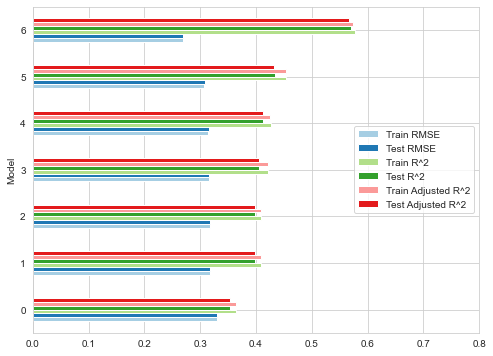

In [105]:
sns.set_palette("Paired")
ax = results[['Independent Variables', 'Train RMSE', 'Test RMSE',
        'Train R^2', 'Test R^2', 'Train Adjusted R^2', 'Test Adjusted R^2']].plot.barh(ylabel='Score', 
         xlim=(0,0.8), figsize=(8,6)).legend(loc='right')

Based on all metrics calculated, including Test Adjusted R^2, the best performing model is Model 6 (i.e., the model that used all variables, including all of the different regions as dummy variables.)  This leads us to believe that region is an important variable into the model.

We also notice that the performance of this model is not great.  The Test Adjusted R^2 is 0.567, which is not very high.  We noticed that there are large differences in the data between regions.  Hence, a better approach to predict price would probably be to create separate models for different regions.  However, this is beyond the scope of this project.

In [106]:
results[['Intercept','Coefficients']]

,Intercept,Coefficients
Model,,
0,1.166,[0.5]
1,1.209,"[0.414, -0.097]"
2,1.206,"[0.419, -0.101, 0.008]"
3,1.207,"[0.417, -0.085, -0.01, 0.033, -0.045]"
4,1.207,"[0.418, -0.086, -0.02, 0.044, -0.046, -0.024, ..."
5,1.211,"[0.409, -0.073, -0.041, 0.055, -0.06, -0.014, ..."
6,1.321,"[0.066, -0.039, -0.045, 0.001, -0.038, -0.032,..."


In [107]:
# Coefficients for Model 5. 'organic' is the most important variable.
list(results.loc[5,['Coefficients']])

[array([ 0.409, -0.073, -0.041,  0.055, -0.06 , -0.014,  0.024,  0.072])]

In [108]:
X_train.columns

Index(['Date', '4046', '4225', '4770', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'organic', 'region_Atlanta',
       'region_BaltimoreWashington', 'region_Boise', 'region_Boston',
       'region_BuffaloRochester', 'region_Charlotte', 'region_Chicago',
       'region_CincinnatiDayton', 'region_Columbus', 'region_DallasFtWorth',
       'region_Denver', 'region_Detroit', 'region_GrandRapids',
       'region_HarrisburgScranton', 'region_HartfordSpringfield',
       'region_Houston', 'region_Indianapolis', 'region_Jacksonville',
       'region_LasVegas', 'region_LosAngeles', 'region_Louisville',
       'region_MiamiFtLauderdale', 'region_Nashville',
       'region_NewOrleansMobile', 'region_NewYork',
       'region_NorthernNewEngland', 'region_Orlando', 'region_Philadelphia',
       'region_PhoenixTucson', 'region_Pittsburgh', 'region_Portland',
       'region_RaleighGreensboro', 'region_RichmondNorfolk', 'region_Roanoke',
       'region_Sacramento', 'region_SanDiego', 'region_SanFr

In [109]:
# Coefficients for Model 6. 'organic' is now similarly important as many of the region variables
list(results.loc[6,['Coefficients']])

[array([ 0.066, -0.039, -0.045,  0.001, -0.038, -0.032,  0.03 ,  0.371,
        -0.159,  0.081, -0.185,  0.047, -0.025,  0.051,  0.089, -0.315,
        -0.304, -0.317, -0.189, -0.291, -0.073, -0.029,  0.279, -0.347,
        -0.248, -0.052, -0.146, -0.11 , -0.261, -0.055, -0.336, -0.247,
         0.358, -0.039, -0.025,  0.132, -0.162, -0.198, -0.127,  0.026,
        -0.246, -0.312,  0.111, -0.094,  0.334, -0.023, -0.109, -0.097,
        -0.115, -0.058, -0.108, -0.17 ])]

Regarding important features to predict avocado price, we notice that for all of the models that did not include regions (Models 1-5), the driving variable was always the variable for avocado type: 'organic'.  We make this conclusion by looking at the coefficients from each of these models, where the coefficient for 'organic' was always above 0.4, while the coefficients for the other variables was at or below 0.1.

For our best model, Model 6 (the one that included all of the region variables), we notice that 'organic' is still the most important, with a coefficient equal to 0.367.  However, we notice that many of the region variables are also similarly important, with coefficients such as 0.362, 0.353, 0.343, 0.342, 0.33, 0.315, etc.  This is probably due to the very significant differences that we observed in the data between regions.

Hence, we conclude that even though this model is good, it is not great, and probably a better approach to predict avocado prices would be to create different models for different regions.  This is beyond the scope of this project, but it is a recommendation that we would make for future steps.

# Classification Model Application
## Question 2

Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=10000)

LR.fit(Xo_train,yo_train)

LR_Predictions_Train = LR.predict(Xo_train)
LR_Predictions_Test = LR.predict(Xo_test)

print("LR Test Set:")
print(confusion_matrix(yo_test, LR_Predictions_Test))
print(classification_report(yo_test, LR_Predictions_Test))
print(accuracy_score(yo_test, LR_Predictions_Test))

print("LR Training Set:")
print(confusion_matrix(yo_train, LR_Predictions_Train))
print(classification_report(yo_train, LR_Predictions_Train))
print(accuracy_score(yo_train, LR_Predictions_Train))

LR Test Set:
[[2162   29]
 [   9 2213]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2191
           1       0.99      1.00      0.99      2222

    accuracy                           0.99      4413
   macro avg       0.99      0.99      0.99      4413
weighted avg       0.99      0.99      0.99      4413

0.9913890777249037
LR Training Set:
[[5113   55]
 [  17 5109]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5168
           1       0.99      1.00      0.99      5126

    accuracy                           0.99     10294
   macro avg       0.99      0.99      0.99     10294
weighted avg       0.99      0.99      0.99     10294

0.9930056343501069


C:\Users\Clash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SVM

In [111]:
from sklearn.svm import SVC
SVM = SVC()

SVM.fit(Xo_train,yo_train)

SVM_Predictions_Train= SVM.predict(Xo_train)
SVM_Predictions_Test= SVM.predict(Xo_test)

print("SVM Test Set:")
print(confusion_matrix(yo_test, SVM_Predictions_Test))
print(classification_report(yo_test, SVM_Predictions_Test))
print(accuracy_score(yo_test, SVM_Predictions_Test))

print("SVM Training Set:")
print(confusion_matrix(yo_train, SVM_Predictions_Train))
print(classification_report(yo_train, SVM_Predictions_Train))
print(accuracy_score(yo_train, SVM_Predictions_Train))

C:\Users\Clash\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Test Set:
[[2164   27]
 [  15 2207]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2191
           1       0.99      0.99      0.99      2222

    accuracy                           0.99      4413
   macro avg       0.99      0.99      0.99      4413
weighted avg       0.99      0.99      0.99      4413

0.990482664853841
SVM Training Set:
[[5118   50]
 [  27 5099]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5168
           1       0.99      0.99      0.99      5126

    accuracy                           0.99     10294
   macro avg       0.99      0.99      0.99     10294
weighted avg       0.99      0.99      0.99     10294

0.9925199145133087


KNN

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
KNN = KNeighborsClassifier(n_neighbors=1)

KNN.fit(Xo_train,yo_train)

KNN_Predictions_Train= KNN.predict(Xo_train)
KNN_Predictions_Test= KNN.predict(Xo_test)

print("KNN Test Set:")
print(confusion_matrix(yo_test, KNN_Predictions_Test))
print(classification_report(yo_test, KNN_Predictions_Test))
print(accuracy_score(yo_test, KNN_Predictions_Test))

print("KNN Training Set:")
print(confusion_matrix(yo_train, KNN_Predictions_Train))
print(classification_report(yo_train, KNN_Predictions_Train))
print(accuracy_score(yo_train, KNN_Predictions_Train))

KNN Test Set:
[[2179   12]
 [   7 2215]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2191
           1       0.99      1.00      1.00      2222

    accuracy                           1.00      4413
   macro avg       1.00      1.00      1.00      4413
weighted avg       1.00      1.00      1.00      4413

0.9956945388624519
KNN Training Set:
[[5168    0]
 [   0 5126]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5168
           1       1.00      1.00      1.00      5126

    accuracy                           1.00     10294
   macro avg       1.00      1.00      1.00     10294
weighted avg       1.00      1.00      1.00     10294

1.0


In [113]:
# Determining best K

accuracy=[]

for i in range(1,21):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(Xo_train,yo_train)
    KNN_Predictions_Test = KNN.predict(Xo_test)
    Accuracy_Test = accuracy_score(yo_test, KNN_Predictions_Test)
    accuracy.append(Accuracy_Test)    
    
    

Text(0, 0.5, 'Accuracy')

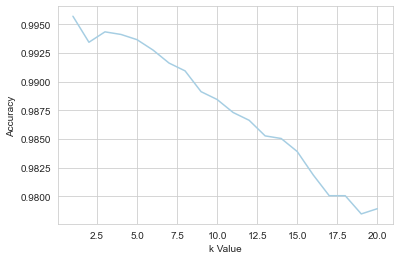

In [114]:
import matplotlib.pyplot as plt
plt.plot(range(1,21),accuracy)
plt.xlabel('k Value')
plt.ylabel('Accuracy')

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
KNN = KNeighborsClassifier(n_neighbors=3)

KNN.fit(Xo_train,yo_train)

KNN_Predictions_Train= KNN.predict(Xo_train)
KNN_Predictions_Test= KNN.predict(Xo_test)

print("KNN Test Set:")
print(confusion_matrix(yo_test, KNN_Predictions_Test))
print(classification_report(yo_test, KNN_Predictions_Test))
print(accuracy_score(yo_test, KNN_Predictions_Test))

print("KNN Training Set:")
print(confusion_matrix(yo_train, KNN_Predictions_Train))
print(classification_report(yo_train, KNN_Predictions_Train))
print(accuracy_score(yo_train, KNN_Predictions_Train))

KNN Test Set:
[[2174   17]
 [   8 2214]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2191
           1       0.99      1.00      0.99      2222

    accuracy                           0.99      4413
   macro avg       0.99      0.99      0.99      4413
weighted avg       0.99      0.99      0.99      4413

0.9943349195558577
KNN Training Set:
[[5150   18]
 [  13 5113]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5168
           1       1.00      1.00      1.00      5126

    accuracy                           1.00     10294
   macro avg       1.00      1.00      1.00     10294
weighted avg       1.00      1.00      1.00     10294

0.9969885370118515


Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(Xo_train,yo_train)

DT_Predictions_Train= DT.predict(Xo_train)
DT_Predictions_Test = DT.predict(Xo_test)

print("DT Test Set:")
print(confusion_matrix(yo_test, DT_Predictions_Test))
print(classification_report(yo_test, DT_Predictions_Test))
print(accuracy_score(yo_test, DT_Predictions_Test))

print("DT Training Set:")
print(confusion_matrix(yo_train, DT_Predictions_Train))
print(classification_report(yo_train, DT_Predictions_Train))
print(accuracy_score(yo_train, DT_Predictions_Train))

DT Test Set:
[[2177   14]
 [  22 2200]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2191
           1       0.99      0.99      0.99      2222

    accuracy                           0.99      4413
   macro avg       0.99      0.99      0.99      4413
weighted avg       0.99      0.99      0.99      4413

0.9918422841604351
DT Training Set:
[[5168    0]
 [   0 5126]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5168
           1       1.00      1.00      1.00      5126

    accuracy                           1.00     10294
   macro avg       1.00      1.00      1.00     10294
weighted avg       1.00      1.00      1.00     10294

1.0


Random Forests

In [117]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(Xo_train,yo_train)

RFC_Predictions_Train= RFC.predict(Xo_train)
RFC_Predictions_Test = RFC.predict(Xo_test)

print("RF Test Set:")
print(confusion_matrix(yo_test, RFC_Predictions_Test))
print(classification_report(yo_test, RFC_Predictions_Test))
print(accuracy_score(yo_test, RFC_Predictions_Test))

print("RF Training Set:")
print(confusion_matrix(yo_train, RFC_Predictions_Train))
print(classification_report(yo_train, RFC_Predictions_Train))
print(accuracy_score(yo_train, RFC_Predictions_Train))

RF Test Set:
[[2180   11]
 [   6 2216]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2191
           1       1.00      1.00      1.00      2222

    accuracy                           1.00      4413
   macro avg       1.00      1.00      1.00      4413
weighted avg       1.00      1.00      1.00      4413

0.9961477452979832
RF Training Set:
[[5168    0]
 [   0 5126]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5168
           1       1.00      1.00      1.00      5126

    accuracy                           1.00     10294
   macro avg       1.00      1.00      1.00     10294
weighted avg       1.00      1.00      1.00     10294

1.0


In [118]:
# Determining best n

accuracy1=[]

for i in range(100,200):
    RFC = RFC = RandomForestClassifier(n_estimators=100)
    RFC.fit(Xo_train,yo_train)
    RFC_Predictions_Test = RFC.predict(Xo_test)
    Accuracy_Test = accuracy_score(yo_test, RFC_Predictions_Test)
    accuracy1.append(Accuracy_Test)    
    
    

Text(0, 0.5, 'Accuracy')

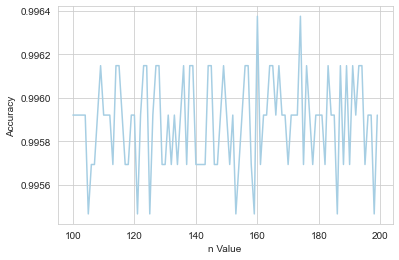

In [119]:
plt.plot(range(100,200),accuracy1)
plt.xlabel('n Value')
plt.ylabel('Accuracy')

In [120]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=108)
RFC.fit(Xo_train,yo_train)

RFC_Predictions_Train= RFC.predict(Xo_train)
RFC_Predictions_Test = RFC.predict(Xo_test)

print("RF Test Set:")
print(confusion_matrix(yo_test, RFC_Predictions_Test))
print(classification_report(yo_test, RFC_Predictions_Test))
print(accuracy_score(yo_test, RFC_Predictions_Test))

print("RF Training Set:")
print(confusion_matrix(yo_train, RFC_Predictions_Train))
print(classification_report(yo_train, RFC_Predictions_Train))
print(accuracy_score(yo_train, RFC_Predictions_Train))

RF Test Set:
[[2180   11]
 [   7 2215]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2191
           1       1.00      1.00      1.00      2222

    accuracy                           1.00      4413
   macro avg       1.00      1.00      1.00      4413
weighted avg       1.00      1.00      1.00      4413

0.9959211420802175
RF Training Set:
[[5168    0]
 [   0 5126]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5168
           1       1.00      1.00      1.00      5126

    accuracy                           1.00     10294
   macro avg       1.00      1.00      1.00     10294
weighted avg       1.00      1.00      1.00     10294

1.0


## Use The Random Forests Model to Predict the Values for the Black Market Avocado Trader.

### Clean the Data using the previous methods

In [121]:
transform_these_columns = ['region']
dummy_columns = pd.get_dummies(black_market_avocados[transform_these_columns], drop_first=True)

In [122]:
#Display labels of all dummy columns
dummy_columns.columns

Index(['region_Atlanta', 'region_BaltimoreWashington', 'region_Boise',
       'region_Boston', 'region_BuffaloRochester', 'region_Charlotte',
       'region_Chicago', 'region_CincinnatiDayton', 'region_Columbus',
       'region_DallasFtWorth', 'region_Denver', 'region_Detroit',
       'region_GrandRapids', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Nashville',
       'region_NewOrleansMobile', 'region_NewYork',
       'region_NorthernNewEngland', 'region_Orlando', 'region_Philadelphia',
       'region_PhoenixTucson', 'region_Pittsburgh', 'region_Portland',
       'region_RaleighGreensboro', 'region_RichmondNorfolk', 'region_Roanoke',
       'region_Sacramento', 'region_SanDiego', 'region_SanFrancisco',
       'region_Seattle', 'region_SouthCarolina', 'region_Spokane',
       'region_StLouis'

In [123]:
#Add created dummy columns into the original data set.
black_market_avocados = pd.concat([black_market_avocados, dummy_columns], axis=1)
black_market_avocados.head()

,Date,Month,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,...,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico
12083,2016-02-07,2,1.66,643.01,7814.15,346.10,2034.08,6364.10,0.00,2016,...,0,0,0,0,0,0,0,0,0,0
10581,2015-01-04,1,1.41,220.61,23.64,0.00,2360.00,0.00,0.00,2015,...,0,0,0,0,0,0,0,0,0,0
2531,2015-04-26,4,1.37,86967.98,42320.51,15.07,48894.75,0.00,2.11,2015,...,0,0,0,0,0,0,1,0,0,0
3858,2016-10-16,10,1.12,48624.65,36096.39,228.23,11681.16,60621.20,77.78,2016,...,0,0,0,0,0,0,0,0,0,0
16656,2017-11-12,11,1.86,1791.82,2951.24,0.00,1655.19,12367.46,3.72,2017,...,0,0,0,0,0,0,0,0,0,0


In [124]:
#Drop the original columns for which dummies are created.
black_market_avocados.drop(transform_these_columns, axis=1, inplace=True)
black_market_avocados.head()

,Date,Month,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,...,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico
12083,2016-02-07,2,1.66,643.01,7814.15,346.10,2034.08,6364.10,0.00,2016,...,0,0,0,0,0,0,0,0,0,0
10581,2015-01-04,1,1.41,220.61,23.64,0.00,2360.00,0.00,0.00,2015,...,0,0,0,0,0,0,0,0,0,0
2531,2015-04-26,4,1.37,86967.98,42320.51,15.07,48894.75,0.00,2.11,2015,...,0,0,0,0,0,0,1,0,0,0
3858,2016-10-16,10,1.12,48624.65,36096.39,228.23,11681.16,60621.20,77.78,2016,...,0,0,0,0,0,0,0,0,0,0
16656,2017-11-12,11,1.86,1791.82,2951.24,0.00,1655.19,12367.46,3.72,2017,...,0,0,0,0,0,0,0,0,0,0


In [125]:
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length

In [126]:
black_market_avocados['Date'] = black_market_avocados['Date'].apply(lambda x:year_fraction(x))

In [127]:
black_market_avocados.head()

,Date,Month,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,...,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico
12083,2016.101093,2,1.66,643.01,7814.15,346.10,2034.08,6364.10,0.00,2016,...,0,0,0,0,0,0,0,0,0,0
10581,2015.008219,1,1.41,220.61,23.64,0.00,2360.00,0.00,0.00,2015,...,0,0,0,0,0,0,0,0,0,0
2531,2015.315068,4,1.37,86967.98,42320.51,15.07,48894.75,0.00,2.11,2015,...,0,0,0,0,0,0,1,0,0,0
3858,2016.789617,10,1.12,48624.65,36096.39,228.23,11681.16,60621.20,77.78,2016,...,0,0,0,0,0,0,0,0,0,0
16656,2017.863014,11,1.86,1791.82,2951.24,0.00,1655.19,12367.46,3.72,2017,...,0,0,0,0,0,0,0,0,0,0


In [128]:
# drop month and year
black_market_avocados.drop(['Month','year'],axis=1, inplace=True)

In [129]:
black_market_avocados

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,organic,region_Atlanta,...,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico
12083,2016.101093,1.66,643.01,7814.15,346.10,2034.08,6364.10,0.00,1,0,...,0,0,0,0,0,0,0,0,0,0
10581,2015.008219,1.41,220.61,23.64,0.00,2360.00,0.00,0.00,1,0,...,0,0,0,0,0,0,0,0,0,0
2531,2015.315068,1.37,86967.98,42320.51,15.07,48894.75,0.00,2.11,0,0,...,0,0,0,0,0,0,1,0,0,0
3858,2016.789617,1.12,48624.65,36096.39,228.23,11681.16,60621.20,77.78,0,0,...,0,0,0,0,0,0,0,0,0,0
16656,2017.863014,1.86,1791.82,2951.24,0.00,1655.19,12367.46,3.72,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12829,2016.751366,2.33,61.79,3168.72,6.91,3937.98,153.51,0.00,1,0,...,0,0,0,0,0,0,0,0,0,0
5081,2016.273224,0.93,125383.51,228654.14,9317.80,363375.18,150.02,1566.84,0,0,...,0,0,0,1,0,0,0,0,0,0
7893,2017.019178,1.22,196279.04,665608.45,2547.79,80425.68,6315.06,2594.44,0,0,...,0,0,1,0,0,0,0,0,0,0
7449,2017.402740,1.32,60061.87,29709.54,1890.54,44354.41,7658.58,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
SS = StandardScaler() 

In [131]:
black_market_avocados=black_market_avocados.copy()
black_market_avocados[['Date','AveragePrice','4046','4046','4225','4770','Small Bags','Large Bags', 'XLarge Bags']] = SS.fit_transform(black_market_avocados[['Date','AveragePrice','4046','4046','4225','4770','Small Bags','Large Bags', 'XLarge Bags']])
black_market_avocados.head()

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,organic,region_Atlanta,...,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico
12083,-0.525737,0.673480,-0.420164,-0.536446,-0.334600,-0.356474,-0.239893,-0.266608,1,0,...,0,0,0,0,0,0,0,0,0,0
10581,-1.666023,0.059663,-0.422018,-0.589795,-0.350930,-0.354454,-0.408215,-0.266608,1,0,...,0,0,0,0,0,0,0,0,0,0
2531,-1.345862,-0.038548,-0.041392,-0.300148,-0.350219,-0.065976,-0.408215,-0.266057,0,0,...,0,0,0,0,0,0,1,0,0,0
3858,0.192658,-0.652364,-0.209633,-0.342770,-0.340161,-0.296670,1.195130,-0.246270,0,0,...,0,0,0,0,0,0,0,0,0,0
16656,1.312622,1.164533,-0.415123,-0.569747,-0.350930,-0.358823,-0.081113,-0.265636,1,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
black_market_avocados.drop(['organic'],axis=1,inplace=True)

## Prediction for whether the black market avocados are organic or not based on the given data.

In [133]:
black_market_avocados

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,region_Atlanta,region_BaltimoreWashington,...,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico
12083,-0.525737,0.673480,-0.420164,-0.536446,-0.334600,-0.356474,-0.239893,-0.266608,0,1,...,0,0,0,0,0,0,0,0,0,0
10581,-1.666023,0.059663,-0.422018,-0.589795,-0.350930,-0.354454,-0.408215,-0.266608,0,0,...,0,0,0,0,0,0,0,0,0,0
2531,-1.345862,-0.038548,-0.041392,-0.300148,-0.350219,-0.065976,-0.408215,-0.266057,0,0,...,0,0,0,0,0,0,1,0,0,0
3858,0.192658,-0.652364,-0.209633,-0.342770,-0.340161,-0.296670,1.195130,-0.246270,0,0,...,0,0,0,0,0,0,0,0,0,0
16656,1.312622,1.164533,-0.415123,-0.569747,-0.350930,-0.358823,-0.081113,-0.265636,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12829,0.152747,2.318508,-0.422714,-0.568258,-0.350604,-0.344671,-0.404154,-0.266608,0,0,...,0,0,0,0,0,0,0,0,0,0
5081,-0.346138,-1.118865,0.127166,0.975858,0.088707,1.883545,-0.404247,0.143105,0,0,...,0,0,0,1,0,0,0,0,0,0
7893,0.432178,-0.406838,0.438238,3.968105,-0.230719,0.129490,-0.241190,0.411813,0,0,...,0,0,1,0,0,0,0,0,0,0
7449,0.832380,-0.161311,-0.159449,-0.386507,-0.261729,-0.094123,-0.205656,-0.266608,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
bmavocado_prediction = RFC.predict(black_market_avocados)

bmavocado_prediction = pd.DataFrame(bmavocado_prediction)

print("For the \'Black Market\' Avocados data,")
print("The distribution of conventional and organic is as follows:")
print(bmavocado_prediction.value_counts())


For the 'Black Market' Avocados data,
The distribution of conventional and organic is as follows:
0    315
1    185
dtype: int64


##### 0 = conventional, 1 = organic. This shows that 315 of the rows were conventional, while 185 rows were organic.